In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from pathlib import Path
import csv
from statistics import mean

In [3]:
with open("ECDC_surveillance_data_Antimicrobial_resistance.csv", 'r') as file:
    reader = csv.reader(file)
    all_rows = []
    for row in reader:
        if row[-2] != "-":
            all_rows.append(row[4:-1])
print(all_rows)

[['Time', 'RegionCode', 'RegionName', 'NumValue'], ['2000', 'AT', 'Austria', '17.801047120'], ['2000', 'BE', 'Belgium', '20.852359200'], ['2000', 'BG', 'Bulgaria', '40.196078430'], ['2000', 'CZ', 'Czechia', '4.271844660'], ['2000', 'DE', 'Germany', '12.471910110'], ['2000', 'DK', 'Denmark', '0.199600790'], ['2000', 'EL', 'Greece', '49.726775950'], ['2000', 'ES', 'Spain', '29.404900810'], ['2000', 'FI', 'Finland', '0.817438690'], ['2000', 'IE', 'Ireland', '37.964774950'], ['2000', 'IS', 'Iceland', '2.500000000'], ['2000', 'IT', 'Italy', '44.255319140'], ['2000', 'LU', 'Luxembourg', '17.910447760'], ['2000', 'MT', 'Malta', '35.526315780'], ['2000', 'NL', 'Netherlands', '0.269541770'], ['2000', 'NO', 'Norway', '0.000000000'], ['2000', 'PT', 'Portugal', '25.165562910'], ['2000', 'SE', 'Sweden', '0.541271980'], ['2000', 'SI', 'Slovenia', '21.052631570'], ['2000', 'UK', 'United Kingdom', '41.437632130'], ['2001', 'AT', 'Austria', '7.553956830'], ['2001', 'BE', 'Belgium', '22.529224220'], ['2

In [4]:
all_rows_array = np.array(all_rows)
Portugal_rows = all_rows_array[np.where(all_rows_array[:,2]=="Portugal")]

In [5]:
all_rows_array[:,2]

array(['RegionName', 'Austria', 'Belgium', 'Bulgaria', 'Czechia',
       'Germany', 'Denmark', 'Greece', 'Spain', 'Finland', 'Ireland',
       'Iceland', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Portugal', 'Sweden', 'Slovenia', 'United Kingdom', 'Austria',
       'Belgium', 'Bulgaria', 'Czechia', 'Germany', 'Denmark', 'Estonia',
       'Greece', 'Spain', 'Finland', 'France', 'Croatia', 'Hungary',
       'Ireland', 'Iceland', 'Italy', 'Luxembourg', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Sweden',
       'Slovenia', 'Slovakia', 'United Kingdom', 'Austria', 'Belgium',
       'Bulgaria', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland',
       'Iceland', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia',
       'United Kingdom', 'Austria', 'Belgium', 'Bulgaria', 'Cyprus',
       'Czechia', '

In [6]:
all_rows_array[np.where(all_rows_array[:,2]=="Spain")]

array([['2000', 'ES', 'Spain', '29.404900810'],
       ['2001', 'ES', 'Spain', '24.446786090'],
       ['2002', 'ES', 'Spain', '23.327759190'],
       ['2003', 'ES', 'Spain', '24.011502510'],
       ['2004', 'ES', 'Spain', '26.474442980'],
       ['2005', 'ES', 'Spain', '27.150336570'],
       ['2006', 'ES', 'Spain', '25.219150370'],
       ['2007', 'ES', 'Spain', '25.456760040'],
       ['2008', 'ES', 'Spain', '26.693227090'],
       ['2009', 'ES', 'Spain', '25.947521860'],
       ['2010', 'ES', 'Spain', '25.327291030'],
       ['2011', 'ES', 'Spain', '22.461538460'],
       ['2012', 'ES', 'Spain', '24.275934700'],
       ['2013', 'ES', 'Spain', '22.566122670'],
       ['2014', 'ES', 'Spain', '22.135416660'],
       ['2015', 'ES', 'Spain', '25.292026400'],
       ['2016', 'ES', 'Spain', '25.809768630'],
       ['2017', 'ES', 'Spain', '25.107758620'],
       ['2018', 'ES', 'Spain', '24.222585920'],
       ['2019', 'ES', 'Spain', '22.353375130'],
       ['2020', 'ES', 'Spain', '23.29842

In [7]:
years = []
for year in range(2000,2021):
    years.append(year)

In [8]:
EU_results_means = []
for each_year in years:
    EU_results_means.append(np.mean(all_rows_array[np.where(all_rows_array[:,0]==f'{each_year}')][:,3].astype(float)))

In [9]:
EU_results_means

[20.1182726875,
 18.76719460769231,
 20.329931808888887,
 23.01920166071428,
 24.071142472758616,
 23.98851738689655,
 22.825795582758616,
 20.477529131034483,
 20.275967426551723,
 19.744670226666667,
 19.206928385172418,
 19.635152192333337,
 19.176171946333326,
 19.19776643133333,
 18.02733346666667,
 17.822551174,
 16.84778180066667,
 16.013093837333333,
 15.835524930000002,
 14.923790448999998,
 15.293972354827588]

In [10]:
Years_from_2010 = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
EU_results_weighted = [22.2, 18.6, 18.8, 18.1, 19.6, 19.0, 17.7, 16.8, 16.4, 15.7, 16.7]
EU_data = pd.DataFrame({'Time': Years_from_2010,
                        'RegionCode': 'EU/EEA',
                        'RegionName': 'EU/EEA',
                        'NumValue': EU_results_weighted})

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(data=all_rows[1:], columns=all_rows[0])

df.Time = df.Time.astype(int)
df.RegionName = df.RegionName.astype(str)
df.RegionCode = df.RegionCode.astype(str)
df.NumValue = df.NumValue.astype(float)

In [13]:
df = pd.concat((df, EU_data))

In [14]:
df = df.set_index(['RegionName', 'Time']).sort_index().drop(columns='RegionCode')
df

NumValue
RegionName     Time           
Austria        2000  17.801047
               2001   7.553957
               2002  12.087912
               2003  15.384615
               2004  14.436620
...                        ...
United Kingdom 2015  10.845121
               2016   6.729195
               2017   6.923337
               2018   7.285793
               2019   5.979811

[612 rows x 1 columns]

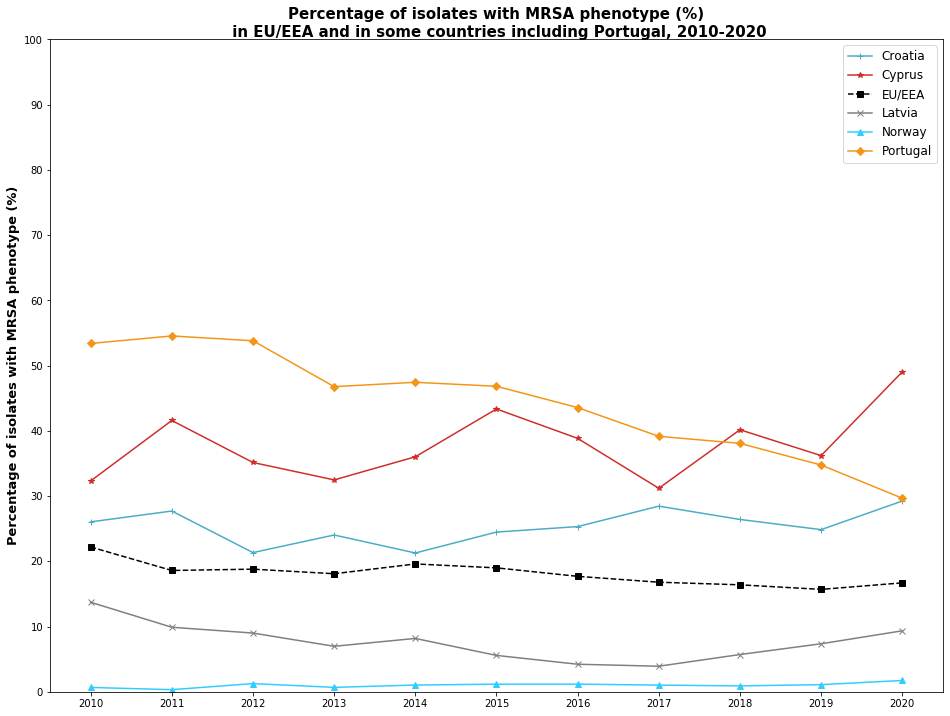

In [15]:
selected = ('Portugal', 'Norway', 'EU/EEA', "Croatia", "Cyprus", "Latvia")
colours = {"Portugal": "#f39517", "Norway": "#33ccff", "EU/EEA": "#000000", "Croatia": "#4bacc6", "Cyprus": "#CF2D2A", "Latvia": "#7f7f7f"}
line_styles = {"Portugal": "-", "Norway": "-", "EU/EEA": "--", "Croatia": "-", "Cyprus": "-", "Latvia": "-"}
markers = {"Portugal": "D", "Norway": "^", "EU/EEA": "s", "Croatia": "+", "Cyprus": "*", "Latvia": "x"}
for country, data in df.groupby('RegionName', as_index=False):
    if country not in selected:
        continue
    plt.plot(data.xs(country).loc[2010:], label=country, color=colours[country], marker=markers[country],linestyle=line_styles[country])
figure = plt.gcf() # get current figure
figure.set_size_inches(16, 12)
plt.ylim((0, 100))
plt.ylabel('Percentage of isolates with MRSA phenotype (%)', fontsize=13, fontweight = "bold")
plt.title("Percentage of isolates with MRSA phenotype (%)\n in EU/EEA and in some countries including Portugal, 2010-2020", fontsize=15, verticalalignment='center', fontweight = "bold")
plt.legend(loc="best", fontsize="large")
plt.xticks(Years_from_2010)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.savefig("Plot_MRSA.svg", orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()

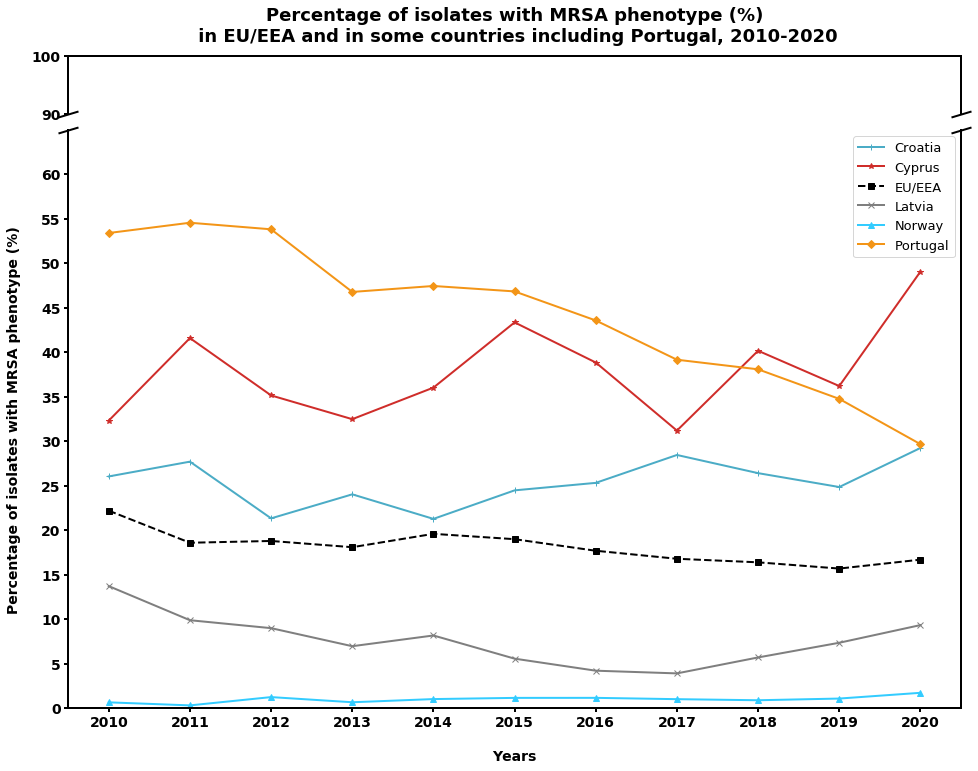

In [28]:
selected = ('Portugal', 'Norway', 'EU/EEA', "Croatia", "Cyprus", "Latvia")
colours = {"Portugal": "#f39517", "Norway": "#33ccff", "EU/EEA": "#000000", "Croatia": "#4bacc6", "Cyprus": "#CF2D2A", "Latvia": "#7f7f7f"}
line_styles = {"Portugal": "-", "Norway": "-", "EU/EEA": "--", "Croatia": "-", "Cyprus": "-", "Latvia": "-"}
markers = {"Portugal": "D", "Norway": "^", "EU/EEA": "s", "Croatia": "+", "Cyprus": "*", "Latvia": "x"}

f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), gridspec_kw={'height_ratios': [1, 10]})
plt.subplots_adjust(hspace=.05)

for country, data in df.groupby('RegionName', as_index=False):
    if country not in selected:
        continue
    ax2.plot(data.xs(country).loc[2010:], label=country, color=colours[country], marker=markers[country],linestyle=line_styles[country], linewidth=2)
    
ax2.set_ylim(0, 65)
ax2_ticks = np.arange(0, 65, 5)
ax2.set_yticks(ax2_ticks)
ax2.axes.xaxis.set_ticklabels(Years_from_2010, fontsize=14)
ax2.set_yticklabels(ax2_ticks, fontsize=14, weight='bold')
ax2.get_xaxis().set_visible(True)
ax2.spines['top'].set_visible(False)
ax2.xaxis.tick_bottom()
ax2.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labelbottom=True)
                
ax.set_ylim(90, 100)
ax_ticks = np.arange(90, 110, 10)
ax.set_yticks(ax_ticks)
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.2f}'))
# ax2.set_xticklabels(labels, fontsize="medium", weight='bold')
ax.set_yticklabels(ax.get_yticks(), fontsize=14, weight='bold')
# ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.2f}'))
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

#ax.text(1, aa_reference+aa_reference_std+0.05, f'{aa_reference:.3f} ± {aa_reference_std:.3f}', ha='center', fontsize=ft_labels, color='#595959', weight='bold')
#ax.text(1.5, cg_reference+cg_reference_std+0.05, f'{cg_reference:.3f} ± {cg_reference_std:.3f}', ha='center', fontsize=ft_labels, color='#595959', weight='bold')

d = .3  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=20,
              linestyle="none", color='k', mec='k', mew=2, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)
ax.tick_params(width=2, length=4)
ax2.tick_params(width=2, length=4)

plt.ylabel('Percentage of isolates with MRSA phenotype (%)', fontsize=14, fontweight = "bold", labelpad=20)
plt.xlabel('Years', fontsize=14, fontweight = "bold", labelpad=20)
ax.set_title("Percentage of isolates with MRSA phenotype (%)\n in EU/EEA and in some countries including Portugal, 2010-2020", fontsize=18, verticalalignment='center', fontweight = "bold", pad=30)
ax2.legend(loc="upper right", fontsize=13)
plt.xticks(Years_from_2010, fontweight="bold")
plt.savefig("Plot_MRSA.svg", orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()

In [17]:
df.xs('Portugal')

,NumValue
Time,
2000,25.165563
2001,31.861804
2002,38.121547
2003,45.498548
2004,46.095955
2005,46.574154
2006,48.085758
2007,48.373102
2008,52.892031


In [18]:
list(Portugal_rows[10:,3].astype(float))

[53.39865278,
 54.55241009,
 53.81443298,
 46.77824267,
 47.44754149,
 46.83614258,
 43.57266936,
 39.16309012,
 38.0839895,
 34.76263399,
 29.67565929]

In [19]:
round(list(Portugal_rows[10:,3].astype(float))[0], 1)

53.4

In [20]:
Portugal_results_from_2010

NameError: name 'Portugal_results_from_2010' is not defined

In [ ]:
plt.plot(Years_from_2010, EU_results_weighted, "r+-", color="#4bacc6")
plt.plot(Years_from_2010, list(Portugal_rows[10:,3].astype(float)), ".-", color="#f39517")
plt.legend(["EU/EEA", "Portugal"], fontsize="large")
plt.ylabel('Percentage of isolates with MRSA phenotype (%)', fontsize=13, fontweight = "bold")
i = 0
for i in range(0, 11):
    plt.text(x=np.array(Years_from_2010[i])-0.1, y=np.array(EU_results_weighted[i])-2.5, s=str(EU_results_weighted[i]), verticalalignment="center")
    i += 1
for i in range(0, 11):
    plt.text(x=np.array(Years_from_2010[i])-0.1, y=Portugal_results_from_2010[i].astype(float)-2.5, s=str(round(list(Portugal_rows[10:,3].astype(float))[i], 1)), verticalalignment="center")
    i += 1
plt.title("Percentage of isolates with MRSA phenotype (%)\n in EU/EEA and in Portugal, 2010-2020", fontsize=15, verticalalignment='center', fontweight = "bold")
figure = plt.gcf() # get current figure
figure.set_size_inches(16, 12)
plt.ylim((0, 100))
plt.xticks(Years_from_2010)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.savefig("Plot_MRSA.svg", orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()